In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
inputfile = "../Data/train_flatten.csv"

In [2]:
df = pd.read_csv(inputfile, delimiter=',', skipinitialspace=True)


/Users/bpc_msds2019/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
list(df)

['Unnamed: 0',
 'channelGrouping',
 'date',
 'fullVisitorId',
 'sessionId',
 'socialEngagementType',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'bounces',
 'hits',
 'newVisits',
 'pageviews',
 'transactionRevenue',
 'visits',
 'browser',
 'deviceCategory',
 'isMobile',
 'operatingSystem',
 'adContent',
 'adwordsClickInfo',
 'campaign',
 'isTrueDirect',
 'keyword',
 'medium',
 'referralPath',
 'source',
 'city',
 'continent',
 'country',
 'metro',
 'networkDomain',
 'region',
 'subContinent']

In [4]:
df['transactionRevenue'].fillna(0,inplace=True)

# AdContent

In [5]:
df.groupby('adContent')['transactionRevenue'].sum().sort_values(ascending=False)

adContent
Google Merchandise Collection                  1.495831e+10
Display Ad created 3/11/14                     3.023100e+08
Full auto ad IMAGE ONLY                        2.623800e+08
{KeyWord:Google Branded Gear}                  2.242400e+08
Google Online Store                            1.634200e+08
20% discount                                   8.342000e+07
{KeyWord:Google Men's T-Shirts}                7.782000e+07
Display Ad created 3/11/15                     4.200000e+07
Swag with Google Logos                         3.446000e+07
Display Ad created 11/17/14                    2.295000e+07
{KeyWord:Want Google Stickers?}                2.244000e+07
{KeyWord:Google Drinkware}                     1.495000e+07
visit us again                                 0.000000e+00
GA Help Center                                 0.000000e+00
Ad from 11/3/16                                0.000000e+00
Ad from 11/7/16                                0.000000e+00
Ad from 12/13/16              

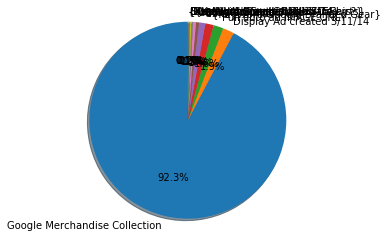

In [6]:
sizes = df.groupby('adContent')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values
sizes = sizes/sum(df.groupby('adContent')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values)
sizes = sizes*100

labels = df.groupby('adContent')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
df.groupby('adContent')['adContent'].count().sort_values(ascending=False)

adContent
Google Merchandise Collection                  5122
Google Online Store                            1245
Display Ad created 3/11/14                      967
Full auto ad IMAGE ONLY                         822
Ad from 12/13/16                                610
Ad from 11/3/16                                 489
Display Ad created 3/11/15                      392
{KeyWord:Google Brand Items}                    251
{KeyWord:Google Merchandise}                    155
Ad from 11/7/16                                 123
Google Merchandise                               87
First Full Auto Template Test Ad                 87
20% discount                                     75
{KeyWord:Google Branded Gear}                    67
{KeyWord:Looking for Google Bags?}               65
Swag with Google Logos                           64
Display Ad created 11/17/14                      50
{KeyWord:Want Google Stickers?}                  42
JD_5a_v1                                         41
{K

In [8]:
labels, values = pd.factorize(df['adContent'])
pd.concat([pd.DataFrame(labels),df['transactionRevenue']],axis=1).corr()

,0,transactionRevenue
0,1.000000,-0.000039
transactionRevenue,-0.000039,1.000000


The correlation here is pretty low for each individual adword.

In [9]:
pd.concat([pd.isna(df['adContent'])*1,df['transactionRevenue']],axis=1).corr()
#pd.isna(df['adContent'])==False).astype(int)

,adContent,transactionRevenue
adContent,1.000000,0.000469
transactionRevenue,0.000469,1.000000


It's a little bit better for adContent vs no adContent.  If anything, we should add it as a boolean value

# adwordsClickInfo

In [10]:
df.groupby('adwordsClickInfo')['transactionRevenue'].sum().sort_values(ascending=False)

adwordsClickInfo
{'criteriaParameters': 'not available in demo dataset'}                                                                                                                                                                                                                        1.497225e+12
{'page': '1', 'slot': 'Top', 'criteriaParameters': 'not available in demo dataset', 'gclId': 'Cj0KEQjw-73GBRCC7KODl9zToJMBEiQAj1Jgf4L-TvGf-14G-liUxzP7_Q4OI1bRc9np2-EnmI0-InsaAq108P8HAQ', 'adNetworkType': 'Google Search', 'targetingCriteria': {}, 'isVideoAd': False}      2.217350e+09
{'page': '1', 'slot': 'Top', 'criteriaParameters': 'not available in demo dataset', 'gclId': 'CjwKCAjwuOHHBRBmEiwAlEMW0B4j09Ol1dHOsKhSIJYpaA6fO2uZCAwUd6PriyuM10PHNpP90JfRrRoCcxwQAvD_BwE', 'adNetworkType': 'Google Search', 'targetingCriteria': {}, 'isVideoAd': False}     1.664870e+09
{'page': '1', 'slot': 'Top', 'criteriaParameters': 'not available in demo dataset', 'gclId': 'CjwKEAiAg5_CBRDo4o6e4o3NtG0SJAB-IatYp

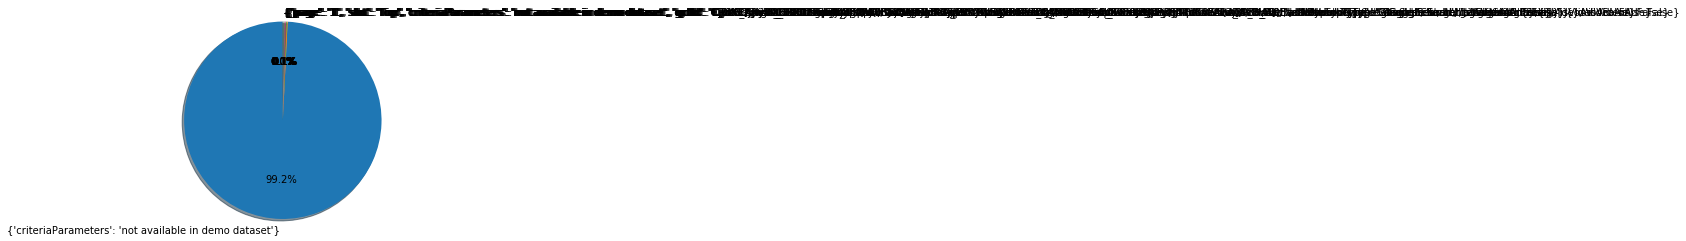

In [12]:
sizes = df.groupby('adwordsClickInfo')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values
sizes = sizes/sum(df.groupby('adwordsClickInfo')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values)
sizes = sizes*100

labels = df.groupby('adwordsClickInfo')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
df.groupby('adwordsClickInfo')['adwordsClickInfo'].count().sort_values(ascending=False)[0:5]

adwordsClickInfo
{'criteriaParameters': 'not available in demo dataset'}                                                                                                                                                                                             882092
{'page': '1', 'slot': 'Top', 'criteriaParameters': 'not available in demo dataset', 'gclId': 'Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3ZdwYO8GTsjiBFd5MPHStZa9y_9NCrI8X97oaAglc8P8HAQ', 'adNetworkType': 'Google Search', 'isVideoAd': False}        70
{'page': '1', 'slot': 'Top', 'criteriaParameters': 'not available in demo dataset', 'gclId': 'Cj0KEQjw1ee_BRD3hK6x993YzeoBEiQA5RH_BEA562M9tvl_mtnAFvtDnDqOQRp1RvxMMgwjcX1LAfwaAj4o8P8HAQ', 'adNetworkType': 'Google Search', 'isVideoAd': False}        41
{'page': '1', 'slot': 'Top', 'criteriaParameters': 'not available in demo dataset', 'gclId': 'CJH1vbf94M8CFUElgQodyakHgQ', 'adNetworkType': 'Google Search', 'isVideoAd': False}                                                      

In [16]:
labels, values = pd.factorize(df['adwordsClickInfo'])
pd.concat([pd.DataFrame(labels),df['transactionRevenue']],axis=1).corr()

,0,transactionRevenue
0,1.000000,0.000173
transactionRevenue,0.000173,1.000000


# campaign

In [17]:
df.groupby('campaign')['transactionRevenue'].sum().sort_values(ascending=False)

campaign
(not set)                                          1.496781e+12
AW - Dynamic Search Ads Whole Site                 2.713255e+10
AW - Accessories                                   1.541782e+10
Data Share Promo                                   5.973800e+08
AW - Apparel                                       7.782000e+07
test-liyuhz                                        4.200000e+07
Retail (DO NOT EDIT owners nophakun and tianyu)    2.295000e+07
Data Share                                         0.000000e+00
All Products                                       0.000000e+00
AW - Electronics                                   0.000000e+00
Name: transactionRevenue, dtype: float64

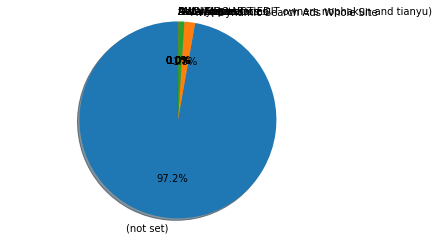

In [18]:
sizes = df.groupby('campaign')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values
sizes = sizes/sum(df.groupby('campaign')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values)
sizes = sizes*100

labels = df.groupby('campaign')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [21]:
df.groupby('campaign')['campaign'].count().sort_values(ascending=False)[0:5]

campaign
(not set)                             865347
Data Share Promo                       16403
AW - Dynamic Search Ads Whole Site     14244
AW - Accessories                        7070
test-liyuhz                              392
Name: campaign, dtype: int64

In [22]:
labels, values = pd.factorize(df['campaign'])
pd.concat([pd.DataFrame(labels),df['transactionRevenue']],axis=1).corr()

,0,transactionRevenue
0,1.000000,-0.001503
transactionRevenue,-0.001503,1.000000


# isTrueDirect

In [29]:
df['isTrueDirect']=df['isTrueDirect'].fillna(False)

In [30]:
df.groupby('isTrueDirect')['transactionRevenue'].sum().sort_values(ascending=False)

isTrueDirect
True     1.142599e+12
False    3.974722e+11
Name: transactionRevenue, dtype: float64

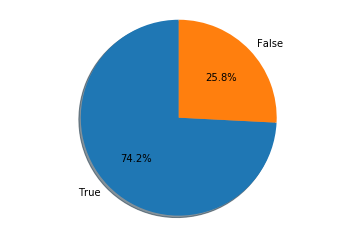

In [31]:
sizes = df.groupby('isTrueDirect')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values
sizes = sizes/sum(df.groupby('isTrueDirect')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values)
sizes = sizes*100

labels = df.groupby('isTrueDirect')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [32]:
labels, values = pd.factorize(df['isTrueDirect'])
pd.concat([pd.DataFrame(labels),df['transactionRevenue']],axis=1).corr()

,0,transactionRevenue
0,1.000000,0.030819
transactionRevenue,0.030819,1.000000


# source

In [39]:
df.groupby('source')['transactionRevenue'].sum().sort_values(ascending=False)[0:44]

source
mall.googleplex.com          6.129680e+11
(direct)                     4.348406e+11
google                       3.689654e+11
dfa                          7.692842e+10
mail.google.com              2.332791e+10
dealspotr.com                5.690640e+09
sites.google.com             4.390780e+09
gdeals.googleplex.com        2.175540e+09
groups.google.com            1.631260e+09
yahoo                        1.374960e+09
facebook.com                 1.137670e+09
l.facebook.com               1.043720e+09
bing                         9.877200e+08
Partners                     5.973800e+08
connect.googleforwork.com    4.048100e+08
mg.mail.yahoo.com            3.773100e+08
siliconvalley.about.com      3.772200e+08
google.com                   3.472400e+08
youtube.com                  3.140700e+08
phandroid.com                2.717400e+08
t.co                         2.676800e+08
plus.google.com              2.054300e+08
googleux.perksplus.com       2.033300e+08
m.facebook.com             

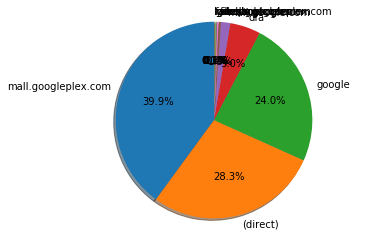

In [40]:
sizes = df.groupby('source')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values
sizes = sizes/sum(df.groupby('source')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values)
sizes = sizes*100

labels = df.groupby('source')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [41]:
labels, values = pd.factorize(df['source'])
pd.concat([pd.DataFrame(labels),df['transactionRevenue']],axis=1).corr()

,0,transactionRevenue
0,1.000000,-0.005012
transactionRevenue,-0.005012,1.000000


# medium

In [42]:
df.groupby('medium')['transactionRevenue'].sum().sort_values(ascending=False)

medium
referral     6.563464e+11
(none)       4.348406e+11
organic      3.263805e+11
cpm          7.833746e+10
cpc          4.355890e+10
affiliate    5.973800e+08
(not set)    9.990000e+06
Name: transactionRevenue, dtype: float64

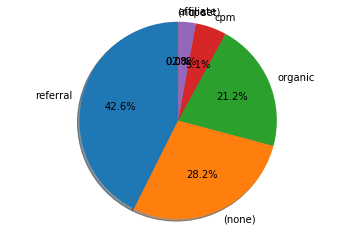

In [43]:
sizes = df.groupby('medium')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values
sizes = sizes/sum(df.groupby('medium')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values)
sizes = sizes*100

labels = df.groupby('medium')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# keyword

In [48]:
df.groupby('keyword')['transactionRevenue'].sum().sort_values(ascending=False)[0:30]

keyword
(not provided)                             3.222450e+11
6qEhsCssdK0z36ri                           2.298290e+10
Google Merchandise                         8.073070e+09
google merchandise store                   5.601830e+09
1hZbAqLCbjwfgOH7                           3.840740e+09
+Google +Merchandise                       1.026330e+09
(Remarketing/Content targeting)            6.066900e+08
googlesupport                              4.168000e+08
1X4Me6ZKNV0zg-jV                           3.089100e+08
+Google +Gear                              2.242400e+08
+google +merchandise +store                2.228400e+08
googlemerchandisestore                     2.164300e+08
google store                               1.038900e+08
google apparel store                       9.197000e+07
category_l1==166                           8.342000e+07
+google+tshirts                            7.782000e+07
youtube merchandise store                  7.693000e+07
+google +merch                          

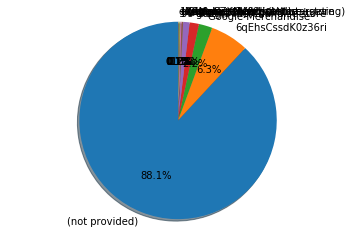

In [49]:
sizes = df.groupby('keyword')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values
sizes = sizes/sum(df.groupby('keyword')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].values)
sizes = sizes*100

labels = df.groupby('keyword')['transactionRevenue'].sum().sort_values(ascending=False)[0:12].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 'referralPath'

In [50]:
df.groupby('referralPath')['transactionRevenue'].sum().sort_values(ascending=False)[0:30]

referralPath
/                                                                                                                                                                                  6.154737e+11
/mail/u/0/                                                                                                                                                                         2.286131e+10
/deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179                                                                                                        3.477840e+09
/offer/2145                                                                                                                                                                        2.175540e+09
/google-merchandise-store                                                                                                                                                          2.161830e+09
/a/google.com/googletopia/d

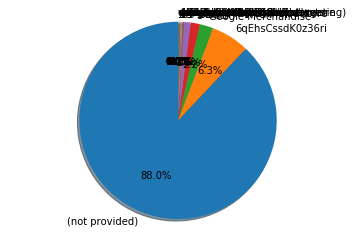

In [53]:
sizes = df.groupby('keyword')['transactionRevenue'].sum().sort_values(ascending=False)[0:20].values
sizes = sizes/sum(df.groupby('keyword')['transactionRevenue'].sum().sort_values(ascending=False)[0:20].values)
sizes = sizes*100

labels = df.groupby('keyword')['transactionRevenue'].sum().sort_values(ascending=False)[0:20].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# channelGrouping

The channel groupings that show up the most (Referral, Direct, and Organic) are basically copies of "medium" and "isTrueDirect".  I will exclude them

In [54]:
df.groupby('channelGrouping')['transactionRevenue'].sum().sort_values(ascending=False)[0:30]

channelGrouping
Referral          6.514299e+11
Direct            4.348406e+11
Organic Search    3.263805e+11
Display           7.833746e+10
Paid Search       4.355890e+10
Social            4.916540e+09
Affiliates        5.973800e+08
(Other)           9.990000e+06
Name: transactionRevenue, dtype: float64

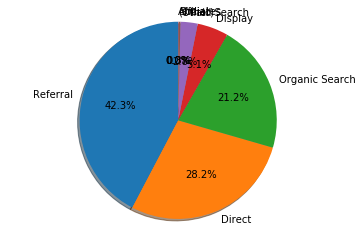

In [56]:
sizes = df.groupby('channelGrouping')['transactionRevenue'].sum().sort_values(ascending=False)[0:20].values
sizes = sizes/sum(df.groupby('channelGrouping')['transactionRevenue'].sum().sort_values(ascending=False)[0:20].values)
sizes = sizes*100

labels = df.groupby('channelGrouping')['transactionRevenue'].sum().sort_values(ascending=False)[0:20].axes[0].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [69]:
df.groupby(['channelGrouping','medium']).count().sort_values(by="date",ascending=False)

,,Unnamed: 0,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,bounces,hits,...,keyword,referralPath,source,city,continent,country,metro,networkDomain,region,subContinent
channelGrouping,medium,,,,,,,,,,,,,,,,,,,,,
Organic Search,organic,381561,381561,381561,381561,381561,381561,381561,381561,184370,381561,...,375535,0,381561,381561,381561,381561,381561,381561,381561,381561
Social,referral,226117,226117,226117,226117,226117,226117,226117,226117,147509,226117,...,0,226116,226117,226117,226117,226117,226117,226117,226117,226117
Direct,(none),143026,143026,143026,143026,143026,143026,143026,143026,70882,143026,...,0,0,143026,143026,143026,143026,143026,143026,143026,143026
Referral,referral,104838,104838,104838,104838,104838,104838,104838,104838,27239,104838,...,0,104825,104838,104838,104838,104838,104838,104838,104838,104838
Paid Search,cpc,25326,25326,25326,25326,25326,25326,25326,25326,9627,25326,...,25179,0,25326,25326,25326,25326,25326,25326,25326,25326
Affiliates,affiliate,16403,16403,16403,16403,16403,16403,16403,16403,8701,16403,...,8,0,16403,16403,16403,16403,16403,16403,16403,16403
Display,cpm,6262,6262,6262,6262,6262,6262,6262,6262,2246,6262,...,2,0,6262,6262,6262,6262,6262,6262,6262,6262
(Other),(not set),120,120,120,120,120,120,120,120,56,120,...,0,0,120,120,120,120,120,120,120,120


In [68]:
df.groupby(['channelGrouping','isTrueDirect']).count().sort_values(by="date",ascending=False)

Unnamed: 0    date  fullVisitorId  sessionId  \
channelGrouping isTrueDirect                                                 
Organic Search  False             313427  313427         313427     313427   
Social          False             212985  212985         212985     212985   
Direct          True              143024  143024         143024     143024   
Organic Search  True               68134   68134          68134      68134   
Referral        False              64482   64482          64482      64482   
                True               40356   40356          40356      40356   
Paid Search     False              20537   20537          20537      20537   
Affiliates      False              13466   13466          13466      13466   
Social          True               13132   13132          13132      13132   
Paid Search     True                4789    4789           4789       4789   
Display         False               4647    4647           4647       4647   
Affiliates      True                2937    2937           2937       2937   
Display         True                1615    1615           1615       1615   
(Other)         False                102     102            102        102   
                True                  18      18             18         18   
Direct          False                  2       2              2          2   

                              socialEngagementType  visitId  visitNumber  \
channelGrouping isTrueDirect                                               
Organic Search  False                       313427   313427       313427   
Social          False                       212985   212985       212985   
Direct          True                        143024   143024       143024   
Organic Search  True                         68134    68134        68134   
Referral        False                        64482    64482        64482   
                True                         40356    40356        40356   
Paid Search     False                        20537    20537        20537   
Affiliates      False                        13466    13466        13466   
Social          True                         13132    13132        13132   
Paid Search     True                          4789     4789         4789   
Display         False                         4647     4647         4647   
Affiliates      True                          2937     2937         2937   
Display         True                          1615     1615         1615   
(Other)         False                          102      102          102   
                True                            18       18           18   
Direct          False                            2        2            2   

                              visitStartTime  bounces    hits      ...       \
channelGrouping isTrueDirect                                       ...        
Organic Search  False                 313427   150965  313427      ...        
Social          False                 212985   138938  212985      ...        
Direct          True                  143024    70882  143024      ...        
Organic Search  True                   68134    33405   68134      ...        
Referral        False                  64482    17648   64482      ...        
                True                   40356     9591   40356      ...        
Paid Search     False                  20537     6928   20537      ...        
Affiliates      False                  13466     7102   13466      ...        
Social          True                   13132     8571   13132      ...        
Paid Search     True                    4789     2699    4789      ...        
Display         False                   4647     1615    4647      ...        
Affiliates      True                    2937     1599    2937      ...        
Display         True                    1615      631    1615      ...        
(Other)         False                    102       46     102      ... 